# 1. Дискретное преобразование Фурье периодических сигналов

## Преобразование Фурье


- $x[n] = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}X(e^{j\omega})e^{j\omega n}d\omega$ - обратное преобразование Фурье

- $X(e^{j\omega}) = \sum\limits_{n=-\infty}^{\infty}x[n]e^{-j\omega n}$ - прямое преобразование Фурье


## Дискретное преобразование Фурье

Если ряд $x[n]$ переодичен с периодом $N$ ($x[n] = x[n+rN]$ для любого целого $r$), то допустимо разложение в виде линейной комбинации комплексных экспонент $e^{jn\omega_k}$ с частотами $\omega_k = 2\pi k/N$:

- $x[n] = \frac{1}{N}\sum\limits_{k=0}^{N-1}X[k]e^{jn\omega_k}$ - обратное дискретное преобразование Фурье (DFT)
- $X[k] = \sum\limits_{n=0}^{N-1}x[n]e^{-jn\omega_k}$ - прямое дискретное преобразование Фурье

### Проверка
$x[n] = \frac{1}{N}\sum\limits_{k=0}^{N-1}X[k]e^{jn\omega_k} = \frac{1}{N}\sum\limits_{k=0}^{N-1}\Big(\sum\limits_{m=0}^{N-1}x[m]e^{-jn\omega_k}\Big)e^{jm\omega_k} = \frac{1}{N}\sum\limits_{m=0}^{N-1}x[m]\sum\limits_{k=0}^{N-1}e^{j(m-n)\omega_k}$

$\sum\limits_{k=0}^{N-1}e^{j(m-n)\omega_k} = 
\sum\limits_{k=0}^{N-1}\Big(e^{j(m-n)2\pi/N}\Big)^k = \frac{1 - e^{j(m-n)2\pi}}{1-e^{j(m-n)2\pi/N}}=N\cdot\delta[m-n]$


$x[n] = \frac{1}{N}\sum\limits_{m=0}^{N-1}x[m]N\cdot\delta[m-n] = x[n]$
![](imag/lecture5-dft-pairs.png "Title")

## Связь периодических последовательнотей с конечными

Пусть $x[n]$ отлична от нуля для $n=1..N-1$. Определим переодическую последовательность $\hat{x}[n]$ как:

$\hat{x}[n] = x[n\%N]$

Определим DFT для $x[n]$ как DFT для $\hat{x}[n]$.

### Пример: квадратный испульс
$x[n] = \begin{cases}
1, 0\le n<4,\\
0, n=4..N\\
\end{cases}$

C:\Software\miniconda\envs\psychopy\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


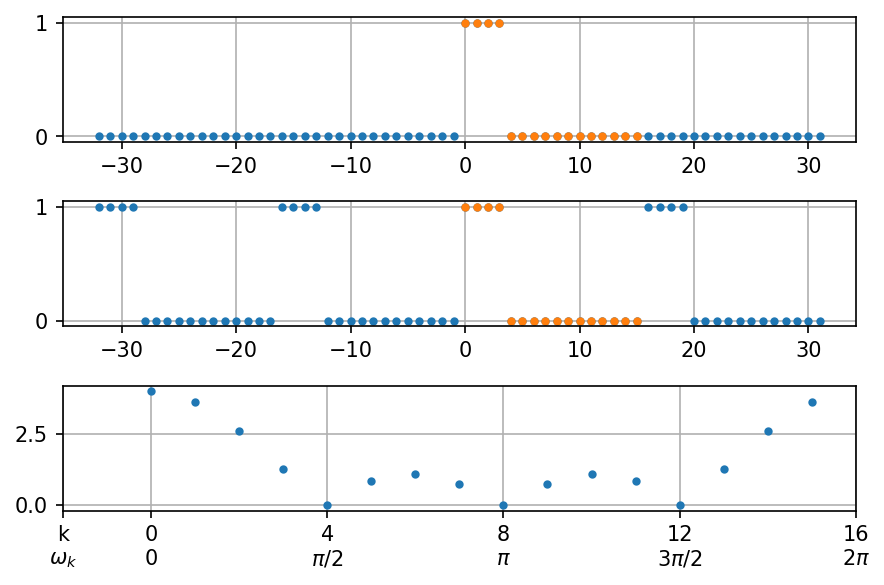

In [1]:
import numpy as np
import pylab as plt
plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, figsize=(6,4), dpi=150)
plt.tight_layout()

# finite duration sequence
N = 16
x = np.zeros(N)
x[:4] = 1

# infinite zero-padded sequence
n = np.arange(-N*2, N*2)
x_infinite = np.zeros(len(n))
x_infinite[[(n>=0) & (n<N)]] = x

# periodic sequence
x_periodic = np.array([x[m%N] for m in n])

# DFT
k = np.arange(N)
w = 2*np.pi*k/N
X = np.array([x.dot(np.exp(-1j*m*w)) for m in range(N)])

# plot
ax[0].plot(n, x_infinite, '.')
ax[0].plot(x, '.')
ax[1].plot(n, x_periodic, '.')
ax[1].plot(x, '.')
ax[2].plot(k, np.abs(X), '.')
ax[2].set_xticks( [-N/8, 0, N/4, N/2, 3*N/4, N])
ax[2].set_xticklabels( ['k\n$\omega_k$', '0\n0', '4\n$\pi/2$', '8\n$\pi$', '12\n$3\pi/2$', '16\n$2\pi$'])
plt.tight_layout()
pass

$k = 1..N$

$\omega_k = 2\pi k/N$

## Пример: синусоида

C:\Software\miniconda\envs\psychopy\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


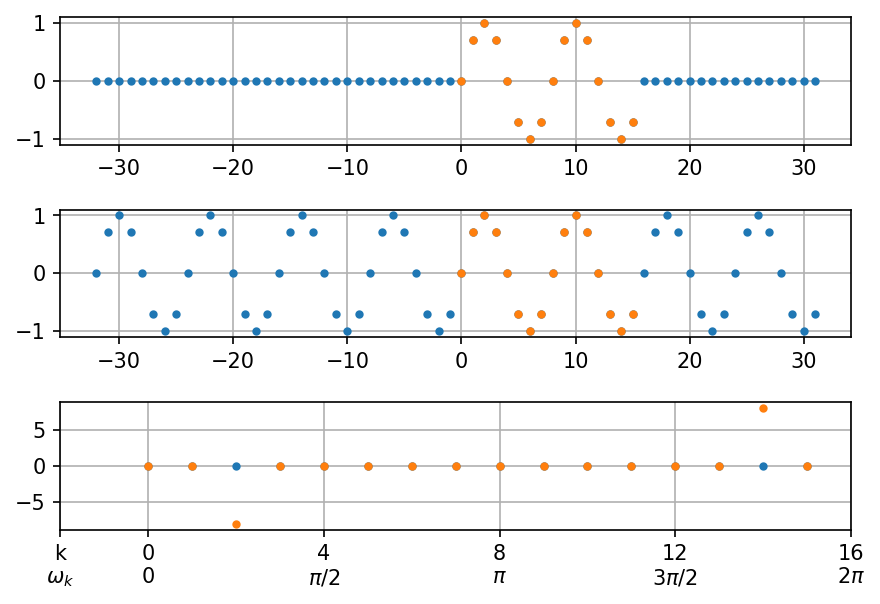

In [2]:
import numpy as np
import pylab as plt
plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, figsize=(6,4), dpi=150)
plt.tight_layout()

# finite duration sequence
N = 16
w_0 = np.pi/4
x = np.sin(w_0*np.arange(N))

# infinite zero-padded sequence
n = np.arange(-N*2, N*2)
x_infinite = np.zeros(len(n))
x_infinite[[(n>=0) & (n<N)]] = x

# periodic sequence
x_periodic = np.array([x[m%N] for m in n])

# DFT
k = np.arange(N)
w = 2*np.pi*k/N
X = np.fft.fft(x)

# plot
ax[0].plot(n, x_infinite, '.')
ax[0].plot(x, '.')
ax[1].plot(n, x_periodic, '.')
ax[1].plot(x, '.')
ax[2].plot(k, X.real, '.')
ax[2].plot(k, X.imag, '.')
# ax[2].plot(k, np.abs(X), '.')
ax[2].set_xticks( [-N/8, 0, N/4, N/2, 3*N/4, N])
ax[2].set_xticklabels( ['k\n$\omega_k$', '0\n0', '4\n$\pi/2$', '8\n$\pi$', '12\n$3\pi/2$', '16\n$2\pi$'])
pass

### Связь со временем

Часто номер отсчета $n$ связан со моментом времени $t$ по заданной частоте дискретезации $F_s$:

$t_n = n/F_s$

$n = t_n\cdot F_s$


$e^{-jn\omega_k} = e^{-jn\cdot 2\pi k/N} = e^{-jt_n\cdot F_s2\pi k/N} = e^{-jt_n\cdot 2\pi f_k}$

$f_k = F_s \cdot k/N = F_s\omega_k/(2\pi)$

Частоте $\omega = 2\pi$ соответствует $f = F_s$


C:\Software\miniconda\envs\psychopy\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


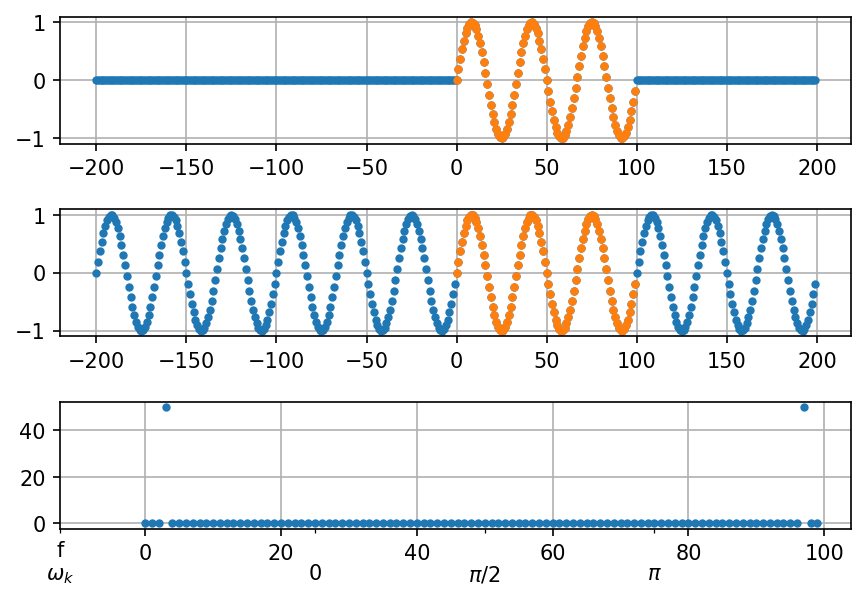

In [3]:
import numpy as np
import pylab as plt
plt.rcParams['axes.grid'] = True
fig, ax = plt.subplots(3, figsize=(6,4), dpi=150)
plt.tight_layout()

# Sampling freq
Fs = 100 # Hz

# Record time
T = 1 # s

# finite duration sequence
N = Fs*T
f_0 = 3
x = np.sin(2*np.pi*f_0*np.arange(N)/Fs)

# infinite zero-padded sequence
n = np.arange(-N*2, N*2)
x_infinite = np.zeros(len(n))
x_infinite[[(n>=0) & (n<N)]] = x

# periodic sequence
x_periodic = np.array([x[m%N] for m in n])

# DFT
k = np.arange(N)
w = 2*np.pi*k/N
f = Fs*w/2/np.pi
X = np.fft.fft(x)

# plot
ax[0].plot(n, x_infinite, '.')
ax[0].plot(x, '.')
ax[1].plot(n, x_periodic, '.')
ax[1].plot(x, '.')
ax[2].plot(f, np.abs(X), '.')
ax[2].set_xticks( [-Fs/8, 0, Fs/4, Fs/2, 3*Fs/4, Fs] , minor=True)
ax[2].set_xticklabels( ['f\n$\omega_k$', '\n0', '\n$\pi/2$', '\n$\pi$', '\n$3\pi/2$', '\n$2\pi$'], minor=True )
pass

In [23]:
from scipy.io.wavfile import read, write
import sounddevice as sd

fs, x = read('../data/cw_flute_shot091.wav')
x = x[:, 0] #запись правого канала
print('Fs = {}\nx[n] = {}'.format(fs, x))
sd.play(x, fs)

Fs = 44100
x[n] = [48 51 55 ...  0  1  0]


(0, 5000)

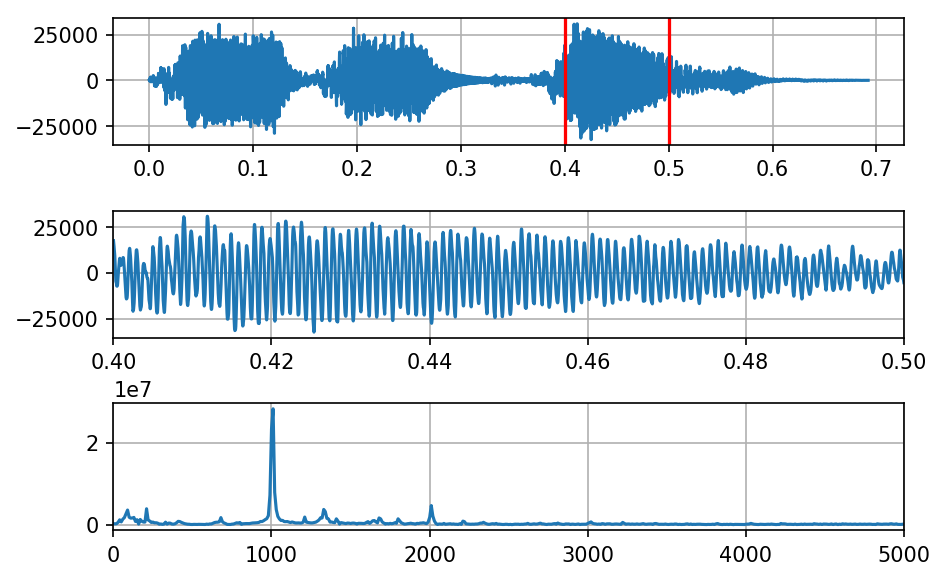

In [46]:
fig, ax = plt.subplots(3, figsize=(6,4), dpi=150)
plt.tight_layout()



slc = (0.4, 0.5)


t = np.arange(len(x))/fs

t_slc = t[(t>slc[0]) & (t<slc[1])]
x_slc = x[(t>slc[0]) & (t<slc[1])]
N = len(x_slc)


X = np.fft.fft(x_slc)
f = fs*np.arange(N)/N


ax[0].plot(t, x)
[ax[0].axvline(s, color='r') for s in slc]
ax[1].plot(t_slc, x_slc)
ax[1].set_xlim(slc)
[ax[0].axvline(s, color='r') for s in slc]

ax[2].plot(f, np.abs(X))
ax[2].set_xlim(0, 5000)

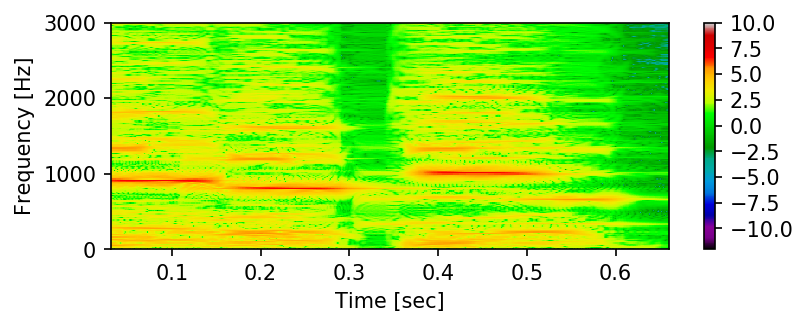

In [45]:
from scipy.signal import spectrogram

plt.figure(dpi=150, figsize=(6, 2))
f, t, Sxx = spectrogram(x, fs, nperseg=fs//16, noverlap=fs//16-fs//1024)
plt.pcolormesh(t, f, np.log10(Sxx), cmap='nipy_spectral', vmin=-12, vmax=10)
plt.ylim(0, 3000)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

In [31]:
x.shape

(30516,)